In [41]:
import os
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = [24, 10]

os.chdir("F:/Pi13C/to analyze")

fileList = os.listdir("./")
fileList = [f for f in fileList if not f.endswith("TRUTH.png")]
fileList = [f for f in fileList if not f.endswith("ANALYZED.png")]
fileList = [f[:-4] for f in fileList]

originalImages = [cv.imread(f + ".png") for f in fileList]
analyzedImages = [cv.threshold(cv.imread(f + "_ANALYZED.png"), 0, 255, cv.THRESH_BINARY)[1] for f in fileList]
truthImages = [cv.threshold(cv.imread(f + "_TRUTH.png"), 0, 255, cv.THRESH_BINARY)[1] for f in fileList]

for i in range(len(analyzedImages)):
    if np.shape(analyzedImages[i])[0] == 2463:
        analyzedImages[i] = np.append(analyzedImages[i], np.zeros((1, 3280, 3)), axis=0)

for i in range(len(truthImages)):
    if np.shape(truthImages[i])[0] == 2463:
        truthImages[i] = np.append(truthImages[i], np.zeros((1, 3280, 3)), axis=0)

assert len(originalImages) == len(analyzedImages)
assert len(analyzedImages) == len(truthImages)


In [42]:
truePositiveCounts = [float(np.sum(i/255)) for i in truthImages]
positiveCounts = [float(np.sum(i/255)) for i in analyzedImages]
truePositiveRatios = [truePositiveCounts[i]/positiveCounts[i] for i in range(len(truePositiveCounts))]
print("mean true positive ratio: " + str(np.sum(truePositiveRatios)/len(truePositiveRatios)))

mean true positive ratio: 0.9808395058534464


In [43]:
def falsePositiveCount(analyzedImage, truthImage):
    analyzedImage = np.array(np.copy(analyzedImage), dtype=bool)
    truthImage = np.array(np.copy(truthImage), dtype=bool)
    falsePositives = np.array(np.logical_and(analyzedImage, np.logical_not(truthImage)), dtype=np.uint8)
    return np.sum(falsePositives)

falsePositiveCounts = [falsePositiveCount(analyzedImages[i], truthImages[i]) for i in range(len(truthImages))]
negativeCounts = [24245760 - positiveCount for positiveCount in positiveCounts]
falsePositiveRatios = [falsePositiveCounts[i]/negativeCounts[i] for i in range(len(falsePositiveCounts))]
print("mean false positive ratio: " + str(sum(falsePositiveRatios)/len(falsePositiveRatios)))

mean false positive ratio: 0.0011894186296211012


In [44]:
def intersectOverUnion(image1, image2):
    image1 = np.array(np.copy(image1), dtype=bool)
    image2 = np.array(np.copy(image2), dtype=bool)
    intersect = np.sum(np.logical_and(image1, image2))
    union = np.sum(np.logical_or(image1, image2))
    return intersect/union

jaccardIndex = [intersectOverUnion(analyzedImages[i], truthImages[i]) for i in range(len(analyzedImages))]
print("mean jaccard index: " + str(sum(jaccardIndex)/len(jaccardIndex)))

mean jaccard index: 0.9785817635094881


In [45]:
def falseNegativeCount(analyzedImage, truthImage):
    analyzedImage = np.array(np.copy(analyzedImage), dtype=bool)
    truthImage = np.array(np.copy(truthImage), dtype=bool)
    falseNegatives = np.array(np.logical_and(np.logical_not(analyzedImage), truthImage), dtype=np.uint8)
    return np.sum(falseNegatives)

def diceCoefficient(truePositive, falsePositive, falseNegative):
    denominator = 2 * truePositive
    numerator = (2 * truePositive) + falsePositive + falseNegative
    return denominator/numerator

falseNegativeCounts = [falseNegativeCount(analyzedImages[i], truthImages[i]) for i in range(len(truthImages))]

diceCoefficients = [diceCoefficient(truePositiveCounts[i], falsePositiveCounts[i], falseNegativeCounts[i]) for i in range(len(truthImages))]
print("mean dice coefficients: " + str(sum(diceCoefficients)/len(diceCoefficients)))

mean dice coefficients: 0.9839310327044624


In [46]:
def areaErrorRatio(truth, measured):
    return abs(truth - measured)/truth

areaErrorRatios = [areaErrorRatio(truePositiveCounts[i], positiveCounts[i]) for i in range(len(truthImages))]
print("mean area error ratio: " + str(sum(areaErrorRatios)/len(areaErrorRatios)))

mean area error ratio: 0.07124299266068106


(0.0, 2.8058762251178457)

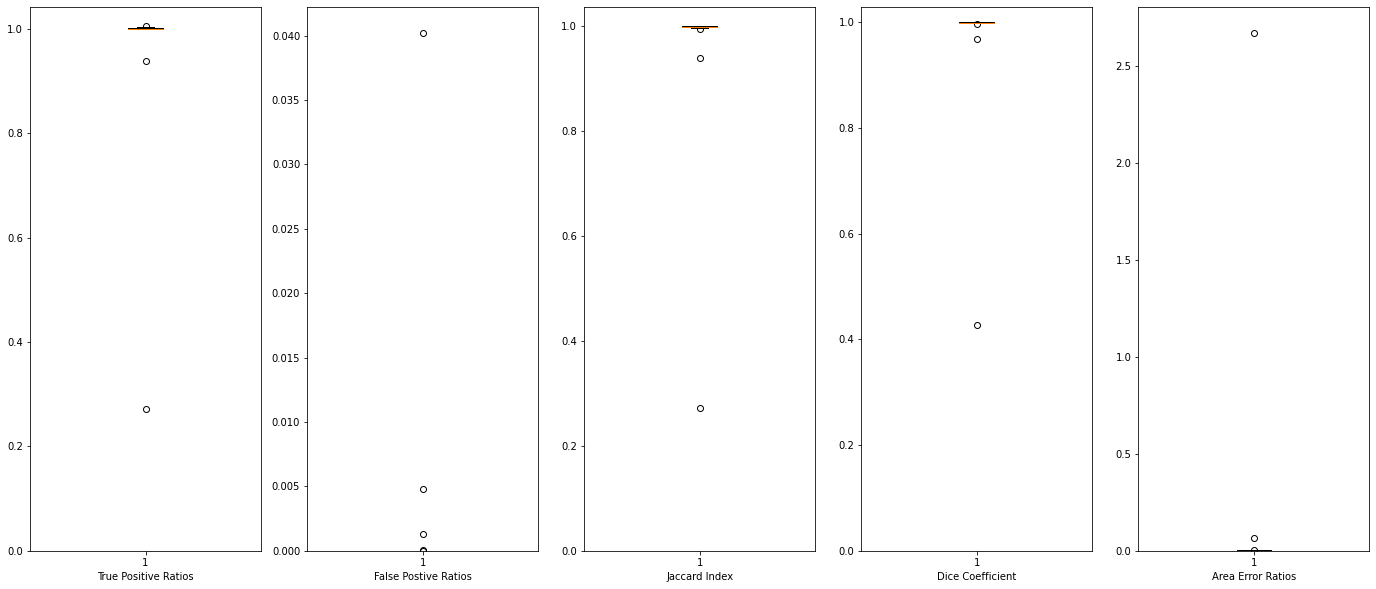

In [66]:
overallData = [[truePositiveRatios[i], falsePositiveRatios[i], jaccardIndex[i], diceCoefficients[i], areaErrorRatios[i]] for i in range(len(truePositiveCounts))]
plt.subplot(1, 5, 1)
plt.boxplot(truePositiveRatios)
plt.xlabel("True Positive Ratios")
plt.ylim(ymin=0)
plt.subplot(1, 5, 2)
plt.boxplot(falsePositiveRatios)
plt.xlabel("False Postive Ratios")
plt.ylim(ymin=0)
plt.subplot(1, 5, 3)
plt.boxplot(jaccardIndex)
plt.xlabel("Jaccard Index")
plt.ylim(ymin=0)
plt.subplot(1, 5, 4)
plt.boxplot(diceCoefficients)
plt.xlabel("Dice Coefficient")
plt.ylim(ymin=0)
plt.subplot(1, 5, 5)
plt.boxplot(areaErrorRatios)
plt.xlabel("Area Error Ratios")
plt.ylim(ymin=0)